# Learn about ERSS authors and the journals they publish in
The intention here is twofold. First, determine which authors have published in ERSS but not in Nature Energy. 
Second, find out which journals all ERSS authors have published in.

Journal codes for searches:
- ERSS journal.id = jour.1053215
- NEnergy journal.id = jour.1136447

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import squarify
#from dslquery import dslquery
import dimcli
dsl = dimcli.Dsl() # On PC, Dsl took argument rich_display=True
from pandas import ExcelWriter
#from openpyxl import load_workbook

In [2]:
# Example query
#d=dsl.query("search publications where journal.id=\"jour.1053215\" return publications[id + year + author_affiliations + times_cited +title]")

## Get author lists for ERSS,  Nature Energy, and their difference
The first thing to do is to build author lists. We will do this for ERSS and Nature Energy, then identify those authors who are in ERSS but not Nature Energy. This will give us an author leads list of those people we haven't already published.

In [3]:
# Define the SN Insights API search function that returns publications. 
# Journal ID needs to be fe in to it.  Returns publications by id, 
# publication year, affiliations, times cited, and Altmetric score.

def searchPubs(journal, limit=1000, skip=0):
    data = """search publications
          where journal.id={}
          return publications[id + year + author_affiliations + times_cited + title + altmetric]
          limit {} skip {}
    """.format(journal,limit,skip)
    return data

In [4]:
# Define script to run complete search over all possible outcomes, 
# hence need for skip.

def dslsearchpublications(journal):
    skip = 0
    pubs = []
    total_pubs = []
    result = {}
    while (skip == 0) or (len(pubs) == 1000):
        pubs = dsl.query(searchPubs(journal=journal,skip=skip),0)['publications']
        total_pubs += pubs
        skip += 1000      
                            
    return total_pubs

In [5]:
# Run API script for Nature Energy publications.
pubs_NE = dslsearchpublications(journal='"jour.1136447"')
pubs_NE_df = pd.DataFrame(pubs_NE)

# Run API script for ERSS publications.
pubs_ERSS = dslsearchpublications(journal='"jour.1053215"')
pubs_ERSS_df = pd.DataFrame(pubs_ERSS)

In [6]:
# Extract researcher ids for each journal from the journal's publications list.

researchers_NE = [auth.get('researcher_id')
    for p in pubs_NE
    for auth in p.get('author_affiliations',[{}])[0]
    if auth.get('researcher_id') is not ""
]

researchers_ERSS = [auth.get('researcher_id')
    for p in pubs_ERSS
    for auth in p.get('author_affiliations',[{}])[0]
    if auth.get('researcher_id') is not ""
]

In [7]:
researchers_ERSS[1783]

'ur.014611644743.49'

In [8]:
pubs_ERSS

[{'title': 'The politics of Asian fracking: Public risk perceptions towards shale gas development in China',
  'author_affiliations': [[{'first_name': 'Huimin',
     'last_name': 'Tan',
     'orcid': '',
     'current_organization_id': '',
     'researcher_id': '',
     'affiliations': [{'id': 'grid.443347.3',
       'name': 'Southwestern University of Finance and Economics',
       'city': 'Chengdu',
       'city_id': 1815286,
       'country': 'China',
       'country_code': 'CN',
       'state': None,
       'state_code': None}]},
    {'first_name': 'Jianhua',
     'last_name': 'Xu',
     'orcid': '',
     'current_organization_id': '',
     'researcher_id': '',
     'affiliations': [{'id': 'grid.11135.37',
       'name': 'Peking University',
       'city': 'Beijing',
       'city_id': 1816670,
       'country': 'China',
       'country_code': 'CN',
       'state': None,
       'state_code': None}]},
    {'first_name': 'Gabrielle',
     'last_name': 'Wong-Parodi',
     'orcid': '',


In [93]:
pubs_ERSS_df.to_excel('pubs_ERSS.xlsx')

In [20]:
inst_ERSS = []

for g in pubs_ERSS:
    diclist = []
    #if 'Client-oriented evaluation of ‘creative destruction’ in policy mixes: Finnish policies on building energy efficiency transition' in g.values():
    if 'author_affiliations' in g.keys():
        for a in g['author_affiliations']:
            for affils in a:


                #dic['affiliations'] = affils['affiliations']
                for aff in affils['affiliations']:
                    dic = {}
                    print(aff)
                    dic['title'] = g['title']
                    dic['pub_id'] = g['id']
                    dic['year'] = g['year']
                    dic['times_cited'] = g['times_cited']
                    if 'altmetric' in g.keys():
                        dic['altmetric'] = g['altmetric']
                    dic['institution'] = aff['name']
                    if 'city' in aff.keys():
                        dic['city'] = aff['city']
                    if 'country' in aff.keys():
                        dic['country'] = aff['country']
                    if 'id' in aff.keys():
                        dic['grid'] = aff['id']
                #dic['grid'] = au['affiliations'].get('id')
                    inst_ERSS.append(dic)
                
inst_ERSS[:15]




# grantees = []

# for g in resgrants:
    
#     diclist = []
#     researchers = g.get('researchers')
#     #print(researchers)
#     for r in researchers:
#         dic = {}
#         dic['id'] = r.get('id')
#         dic['Author'] = '{} {}'.format(r.get('first_name'), r.get('last_name'))
#         print(dic)
#         #print('{} {}'.format(r.get('first_name'), r.get('last_name')))
#         grantees.append(dic)

{'id': 'grid.443347.3', 'name': 'Southwestern University of Finance and Economics', 'city': 'Chengdu', 'city_id': 1815286, 'country': 'China', 'country_code': 'CN', 'state': None, 'state_code': None}
{'id': 'grid.11135.37', 'name': 'Peking University', 'city': 'Beijing', 'city_id': 1816670, 'country': 'China', 'country_code': 'CN', 'state': None, 'state_code': None}
{'id': 'grid.168010.e', 'name': 'Stanford University', 'city': 'Stanford', 'city_id': 5398563, 'country': 'United States', 'country_code': 'US', 'state': 'California', 'state_code': 'US-CA'}
{'id': 'grid.4830.f', 'name': 'University of Groningen', 'city': 'Groningen', 'city_id': 2755251, 'country': 'Netherlands', 'country_code': 'NL', 'state': None, 'state_code': None}
{'id': 'grid.4818.5', 'name': 'Wageningen University & Research', 'city': 'Wageningen', 'city_id': 2745088, 'country': 'Netherlands', 'country_code': 'NL', 'state': None, 'state_code': None}
{'name': 'DB, Nijmegen, The Netherlands'}
{'id': 'grid.449751.a', 'n

[{'title': 'The politics of Asian fracking: Public risk perceptions towards shale gas development in China',
  'pub_id': 'pub.1113110359',
  'year': 2019,
  'times_cited': 0,
  'institution': 'Southwestern University of Finance and Economics',
  'city': 'Chengdu',
  'country': 'China',
  'grid': 'grid.443347.3'},
 {'title': 'The politics of Asian fracking: Public risk perceptions towards shale gas development in China',
  'pub_id': 'pub.1113110359',
  'year': 2019,
  'times_cited': 0,
  'institution': 'Peking University',
  'city': 'Beijing',
  'country': 'China',
  'grid': 'grid.11135.37'},
 {'title': 'The politics of Asian fracking: Public risk perceptions towards shale gas development in China',
  'pub_id': 'pub.1113110359',
  'year': 2019,
  'times_cited': 0,
  'institution': 'Stanford University',
  'city': 'Stanford',
  'country': 'United States',
  'grid': 'grid.168010.e'},
 {'title': 'Pull the plug: How private commitment strategies can strengthen personal norms and promote ene

In [22]:
inst_ERSS_df = pd.DataFrame(inst_ERSS)
inst_ERSS_df#.where(inst_ERSS_df['title']=='Client-oriented evaluation of ‘creative destruction’ in policy mixes: Finnish policies on building energy efficiency transition')

,altmetric,city,country,grid,institution,pub_id,times_cited,title,year
0,NaN,Chengdu,China,grid.443347.3,Southwestern University of Finance and Economics,pub.1113110359,0,The politics of Asian fracking: Public risk pe...,2019
1,NaN,Beijing,China,grid.11135.37,Peking University,pub.1113110359,0,The politics of Asian fracking: Public risk pe...,2019
2,NaN,Stanford,United States,grid.168010.e,Stanford University,pub.1113110359,0,The politics of Asian fracking: Public risk pe...,2019
3,NaN,Groningen,Netherlands,grid.4830.f,University of Groningen,pub.1113011344,0,Pull the plug: How private commitment strategi...,2019
4,NaN,Wageningen,Netherlands,grid.4818.5,Wageningen University & Research,pub.1113011344,0,Pull the plug: How private commitment strategi...,2019
5,NaN,NaN,NaN,NaN,"DB, Nijmegen, The Netherlands",pub.1113011344,0,Pull the plug: How private commitment strategi...,2019
6,NaN,Deggendorf,Germany,grid.449751.a,Deggendorf Institute of Technology,pub.1113006077,0,"Industry, flexibility, and demand response: Ap...",2019
7,NaN,Valparaíso,Chile,grid.8170.e,Pontificial Catholic University of Valparaiso,pub.1113006077,0,"Industry, flexibility, and demand response: Ap...",2019
8,NaN,Deggendorf,Germany,grid.449751.a,Deggendorf Institute of Technology,pub.1113006077,0,"Industry, flexibility, and demand response: Ap...",2019
9,NaN,Valparaíso,Chile,grid.8170.e,Pontificial Catholic University of Valparaiso,pub.1113006077,0,"Industry, flexibility, and demand response: Ap...",2019


In [23]:
inst_ERSS_df.drop_duplicates(['institution','title']).groupby('institution').count().sort_values('title', ascending=False)

,altmetric,city,country,grid,pub_id,times_cited,title,year
institution,,,,,,,,
University of Sussex,39,41,41,41,41,41,41,41
University of Oxford,23,25,25,25,25,25,25,25
Swiss Federal Institute of Technology in Zurich,16,22,22,22,22,22,22,22
Aarhus University,16,22,22,22,22,22,22,22
University of Leeds,20,21,21,21,21,21,21,21
University of Queensland,17,19,19,19,19,19,19,19
University College London,18,19,19,19,19,19,19,19
Cardiff University,10,18,18,18,18,18,18,18
University of Edinburgh,16,17,17,17,17,17,17,17


In [24]:
inst_ERSS_df.drop_duplicates(['institution','title']).groupby('institution').count().sort_values('title', ascending=False).to_excel('test2.xlsx')

In [25]:
# Written function to perform this above.

# Get the list of unique institutions for all ERSS authors
ERSS_institutions = inst_ERSS_df[[
    'institution','city','country'
]].drop_duplicates(['institution'])

ERSS_institutions.sort_values('institution').head()

# Merge dataframes to build a dataframe that contains institutions, 
# their cities, countries, their number of publications in ERSS and the 
# sum/mean of their citations (and Altmetric scores).

# First remove duplicates based on institution and titles. This should 
# produce the set of institutions for each paper.
ERSS_insts_no_dupes = inst_ERSS_df[['institution','title']].\
    drop_duplicates(['institution','title']).groupby('institution').count().\
    sort_values('title', ascending=False)

ERSS_insts_mean = inst_ERSS_df.\
    drop_duplicates(['institution','title']).groupby('institution').mean().\
    sort_values('times_cited', ascending=False).drop('year', axis=1)

ERSS_insts_sum = inst_ERSS_df.\
    drop_duplicates(['institution','title']).groupby('institution').sum().\
    sort_values('times_cited', ascending=False).drop('year', axis=1)

ERSS_insts_list = ERSS_insts_no_dupes.merge(ERSS_insts_mean,
                                            left_on='institution',
                                            right_on='institution'
                                           )

ERSS_insts_list = ERSS_insts_sum.merge(ERSS_insts_list,
                                       left_on='institution',
                                       right_on='institution',
                                       suffixes=('_sum', '_mean')
                                      )

ERSS_insts_list = ERSS_insts_list.merge(ERSS_institutions, 
                                        left_on='institution',
                                        right_on='institution'
                                       )

# Reorder the dataframe to something more intuitively readable, then 
# rename the columns more sensibly.
ERSS_insts_list = ERSS_insts_list[[
    'institution', 
    'city',
    'country', 
    'title',
    'times_cited_sum', 
    'times_cited_mean',
    'altmetric_sum', 
    'altmetric_mean'
]].sort_values('title', ascending=False)#.reset_index()

ERSS_insts_list = ERSS_insts_list.rename(
    columns={
        'title':'publications_count',
        'times_cited_sum':'sum_times_cited',
        'times_cited_mean':'mean_times_cited',
        'altmetric_sum':'sum_altmetric',
        'altmetric_mean':'mean_altmetric'
    }
).reset_index(drop=True)

ERSS_insts_list.head()

,institution,city,country,publications_count,sum_times_cited,mean_times_cited,sum_altmetric,mean_altmetric
0,University of Sussex,Brighton,United Kingdom,41,824,20.097561,1144.0,29.333333
1,University of Oxford,Oxford,United Kingdom,25,414,16.560000,271.0,11.782609
2,Aarhus University,Aarhus,Denmark,22,952,43.272727,833.0,52.062500
3,Swiss Federal Institute of Technology in Zurich,Zurich,Switzerland,22,272,12.363636,426.0,26.625000
4,University of Leeds,Leeds,United Kingdom,21,299,14.238095,276.0,13.800000


In [45]:
# For loop version of the above list comprehension. Seems to be equivalent

res_ERSS = []

for g in pubs_ERSS:
    if 'author_affiliations' in g.keys():
        auth_affil = g['author_affiliations']
        for a in auth_affil:
            for au in a:
                if au['researcher_id'] is not "":
                    res_ERSS.append(au['researcher_id'])
                
res_ERSS[1783]

'ur.014611644743.49'

In [8]:
# Extract full researcher activity for each journal.

full_researchers_NE = [
    dict(
        researcher_id = auth.get('researcher_id'),
        first_name = auth.get('first_name'),
        last_name = auth.get('last_name'), 
        title = p.get('title'),
        year = p.get('year'),
        institution = affil.get('name'),
        city = affil.get('city'),
        country = affil.get('country'),
        grid = affil.get('id'),         
        times_cited = p.get('times_cited'),
        altmetric = p.get('altmetric') 
    )
    for p in pubs_NE
    for auth in p.get('author_affiliations',[{}])[0]
        if auth.get('researcher_id') in list(set(researchers_NE))
    for affil in auth.get('affiliations',[{}])
        if auth.get('researcher_id') in list(set(researchers_NE))
]

full_researchers_ERSS = [
    dict(
        researcher_id = auth.get('researcher_id'),
        first_name = auth.get('first_name'),
        last_name = auth.get('last_name'), 
        title = p.get('title'),
        year = p.get('year'),
        institution = affil.get('name'),
        city = affil.get('city'),
        country = affil.get('country'),
        grid = affil.get('id'),         
        times_cited = p.get('times_cited'),
        altmetric = p.get('altmetric') 
    )
    for p in pubs_ERSS
    for auth in p.get('author_affiliations',[{}])[0]
        if auth.get('researcher_id') in list(set(researchers_ERSS)) 
    for affil in auth.get('affiliations',[{}])
        if auth.get('researcher_id') in list(set(researchers_ERSS))
]

In [9]:
# Create the list of researchers in ERSS but not in Nature Energy.
researchers_diff = set(researchers_ERSS).difference(set(researchers_NE))

# Extract full researcher information for each publication (id, name, 
# year of publication, affiliation, affiliation name, times cited).

full_researchers_diff = [
    dict(
        researcher_id = auth.get('researcher_id'),
        #first_name = auth.get('first_name'),
        #last_name = auth.get('last_name'), 
        author = '{} {}'.format(auth.get('first_name'), auth.get('last_name')),
        title = p.get('title'),
        year = p.get('year'),
        #affiliations = auth.get('affiliations'),
        institution = affil.get('name'),
        city = affil.get('city'),
        country = affil.get('country'),
        grid = affil.get('id'),         
        #name = p.get('author_affiliations')[0][0].get('affiliations')[0].get('name'),
        times_cited = p.get('times_cited'),
        altmetric = p.get('altmetric')         
    )
    for p in pubs_ERSS
    for auth in p.get('author_affiliations',[{}])[0]
    for affil in auth.get('affiliations',[{}])
        if auth.get('researcher_id') in list(set(researchers_diff))
]                   

In [9]:
#pd.DataFrame(researchers_ERSS).to_excel("ERSS_ids.xlsx")

In [10]:
# Make some dataframes
full_researchers_diff_df = pd.DataFrame(full_researchers_diff)
full_researchers_NE_df = pd.DataFrame(full_researchers_NE)
full_researchers_ERSS_df = pd.DataFrame(full_researchers_ERSS)

In [11]:
# Merge dataframes to build a dataframe that contains authors, their 
# most recent affiliations, their number of publications in ERSS and the
# sum/mean of their citations and Altmetric scores.

# First remove duplicates based on researcher ids and titles. This 
# should produce the set of papers with just single authors per paper, 
# ignoring multiple affiliations on each publication.
diff_no_dupes = full_researchers_diff_df.drop_duplicates(['researcher_id', 'title'])


# Calculate the sum of each researcher_id. Key columns here will be 
# times_cited and altmetric.
diff_sum = diff_no_dupes.groupby('researcher_id').sum().drop('year', axis=1)


# Calculate the mean of each researcher_id. Key columns here will be 
# times_cited and altmetric.
diff_mean = diff_no_dupes.groupby('researcher_id').mean().drop('year', axis=1)


# Calculate the count of each researcher_id. Key columns here will be 
# title, which is the paper's title.
diff_count = diff_no_dupes.groupby('researcher_id').count().drop('year', axis=1)


# Merge the sums with the base dataframe, then with the means, then with
# the counts.
diff_auths = diff_sum.merge(
    diff_no_dupes.drop(['times_cited', 'title', 'altmetric'], axis=1),
    left_on='researcher_id',
    right_on='researcher_id'
).drop_duplicates('researcher_id')

diff_auths = diff_mean.merge(
    diff_auths,
    left_on='researcher_id',
    right_on='researcher_id',
    suffixes=('_mean', '_sum')
)

diff_auths = diff_count[['title']].merge(
    diff_auths,
    left_on='researcher_id',
    right_on='researcher_id'
)

# Reorder the dataframe to something more intuitively readable, then 
# rename the columns more sensibly.
diff_auths = diff_auths[[
    'author', 
    'researcher_id',
    'institution', 
    'grid', 
    'city',
    'country',
    'title',
    'times_cited_mean', 
    'times_cited_sum',
    'altmetric_mean', 
    'altmetric_sum', 
    'year'
]]

diff_auths = diff_auths.rename(
    columns={
        'title':'publications',
        'times_cited_sum':'sum_times_cited',
        'times_cited_mean':'mean_times_cited',
        'altmetric':'sum_altmetric',
        'altmetric_mean':'mean_altmetric'
    }
)

# Display the head of the dataframe.
diff_auths.sort_values('publications', ascending=False).head(30)


,author,researcher_id,institution,grid,city,country,publications,mean_times_cited,sum_times_cited,mean_altmetric,altmetric_sum,year
1299,Chien-fei Chen,ur.015436264756.14,University of Tennessee at Knoxville,grid.411461.7,Knoxville,United States,8,13.750000,110,6.666667,40.0,2018
864,Ray Galvin,ur.013352072253.83,RWTH Aachen University,grid.1957.a,Aachen,Germany,6,10.000000,60,1.600000,8.0,2018
1410,Yolande Strengers,ur.016150413403.11,RMIT University,grid.1017.7,Melbourne,Australia,6,9.666667,58,6.666667,40.0,2019
1062,Paul Upham,ur.014261065037.13,University of Leeds,grid.9909.9,Leeds,United Kingdom,6,14.333333,86,9.600000,48.0,2019
1554,Frank W. Geels,ur.0615616770.33,University of Manchester,grid.5379.8,Manchester,United Kingdom,6,19.833333,119,3.500000,21.0,2018
1345,Laurence L. Delina,ur.015644665205.35,Boston University,grid.189504.1,Boston,United States,5,8.400000,42,1.500000,6.0,2019
1304,Yuwan Malakar,ur.015445524113.88,University of Queensland,grid.1003.2,Brisbane,Australia,5,2.800000,14,2.400000,12.0,2019
984,Janet Stephenson,ur.013756654443.11,University of Otago,grid.29980.3a,Dunedin,New Zealand,5,9.800000,49,1.200000,6.0,2018
1704,Thijs Van de Graaf,ur.07642276457.48,Ghent University,grid.5342.0,Ghent,Belgium,5,14.600000,73,11.000000,55.0,2017
263,Ellen Matthies,ur.011105770315.90,Otto-von-Guericke University Magdeburg,grid.5807.a,Magdeburg,Germany,5,11.200000,56,1.333333,4.0,2016


## Analyze institutional information for all ERSS authors

In [12]:
def institutes(researchers):

    # Get the list of unique institutions for all ERSS authors
    institutions = researchers[[
        'institution','city','country'
    ]].drop_duplicates(['institution'])

    institutions.sort_values('institution').head()

    # Merge dataframes to build a dataframe that contains institutions, 
    # their cities, countries, their number of publications in ERSS and the 
    # sum/mean of their citations (and Altmetric scores).

    # First remove duplicates based on institution and titles. This should 
    # produce the set of institutions for each paper.
    insts_no_dupes = researchers[['institution','title']].\
        drop_duplicates(['institution','title']).groupby('institution').count().\
        sort_values('title', ascending=False)

    insts_mean = researchers.\
        drop_duplicates(['institution','title']).groupby('institution').mean().\
        sort_values('times_cited', ascending=False).drop('year', axis=1)

    insts_sum = researchers.\
        drop_duplicates(['institution','title']).groupby('institution').sum().\
        sort_values('times_cited', ascending=False).drop('year', axis=1)

    insts_list = insts_no_dupes.merge(insts_mean,
                                      left_on='institution',
                                      right_on='institution'
                                      )

    insts_list = insts_sum.merge(insts_list,
                                 left_on='institution',
                                 right_on='institution',
                                 suffixes=('_sum', '_mean')
                                 )

    insts_list = insts_list.merge(institutions, 
                                  left_on='institution',
                                  right_on='institution'
                                  )
    
    # Reorder the dataframe to something more intuitively readable, then 
    # rename the columns more sensibly.
    insts_list = insts_list[[
        'institution', 
        'city',
        'country', 
        'title',
        'times_cited_sum',
        'times_cited_mean',
        'altmetric_sum', 
        'altmetric_mean'
    ]].sort_values('title', ascending=False)#.reset_index()

    insts_list = insts_list.rename(
        columns={
            'title':'publications_count',
            'times_cited_sum':'sum_times_cited',
            'times_cited_mean':'mean_times_cited',
            'altmetric_sum':'sum_altmetric',
            'altmetric_mean':'mean_altmetric'
        }
    ).reset_index(drop=True)
    
    # Add columns to indicate if an entry is in the top 25% of each metric
    insts_list['sum_times_cited_top_25pc'] = insts_list['sum_times_cited'].rank(pct=True) >= 0.75
    insts_list['mean_times_cited_top_25pc'] = insts_list['mean_times_cited'].rank(pct=True) >= 0.75
    insts_list['sum_altmetric_top_25pc'] = insts_list['sum_altmetric'].rank(pct=True) >= 0.75
    insts_list['mean_altmetric_top_25pc'] = insts_list['mean_altmetric'].rank(pct=True) >= 0.75
    
    insts_list.head()
    return insts_list

In [13]:
ERSS_insts_list = institutes(full_researchers_ERSS_df)
NE_insts_list = institutes(full_researchers_NE_df)
ERSS_insts_list
NE_insts_list

,institution,city,country,publications_count,sum_times_cited,mean_times_cited,sum_altmetric,mean_altmetric,sum_times_cited_top_25pc,mean_times_cited_top_25pc,sum_altmetric_top_25pc,mean_altmetric_top_25pc
0,Nature Energy,None,None,48,2,0.041667,140.0,2.916667,False,False,False,False
1,National Renewable Energy Laboratory,Golden,United States,23,1342,58.347826,1770.0,76.956522,True,True,True,False
2,Stanford University,Stanford,United States,21,2022,96.285714,2301.0,109.571429,True,True,True,True
3,Lawrence Berkeley National Laboratory,Berkeley,United States,19,976,51.368421,1876.0,98.736842,True,False,True,True
4,"University of California, Berkeley",Berkeley,United States,17,1014,59.647059,1023.0,60.176471,True,True,True,False
5,Argonne National Laboratory,Lemont,United States,16,636,39.750000,809.0,50.562500,True,False,True,False
6,SLAC National Accelerator Laboratory,Menlo Park,United States,15,1391,92.733333,1041.0,69.400000,True,True,True,False
7,University of Oxford,Oxford,United Kingdom,15,1258,83.866667,291.0,19.400000,True,True,True,False
8,Massachusetts Institute of Technology,Cambridge,United States,15,901,60.066667,2113.0,150.928571,True,True,True,True
9,École Polytechnique Fédérale de Lausanne,Lausanne,Switzerland,12,1711,142.583333,1119.0,93.250000,True,True,True,True


In [11]:
# Written function to perform this above.

# Get the list of unique institutions for all ERSS authors
ERSS_institutions = full_researchers_ERSS_df[[
    'institution','city','country'
]].drop_duplicates(['institution'])

ERSS_institutions.sort_values('institution').head()

# Merge dataframes to build a dataframe that contains institutions, 
# their cities, countries, their number of publications in ERSS and the 
# sum/mean of their citations (and Altmetric scores).

# First remove duplicates based on institution and titles. This should 
# produce the set of institutions for each paper.
ERSS_insts_no_dupes = full_researchers_ERSS_df[['institution','title']].\
    drop_duplicates(['institution','title']).groupby('institution').count().\
    sort_values('title', ascending=False)

ERSS_insts_mean = full_researchers_ERSS_df.\
    drop_duplicates(['institution','title']).groupby('institution').mean().\
    sort_values('times_cited', ascending=False).drop('year', axis=1)

ERSS_insts_sum = full_researchers_ERSS_df.\
    drop_duplicates(['institution','title']).groupby('institution').sum().\
    sort_values('times_cited', ascending=False).drop('year', axis=1)

ERSS_insts_list = ERSS_insts_no_dupes.merge(ERSS_insts_mean,
                                            left_on='institution',
                                            right_on='institution'
                                           )

ERSS_insts_list = ERSS_insts_sum.merge(ERSS_insts_list,
                                       left_on='institution',
                                       right_on='institution',
                                       suffixes=('_sum', '_mean')
                                      )

ERSS_insts_list = ERSS_insts_list.merge(ERSS_institutions, 
                                        left_on='institution',
                                        right_on='institution'
                                       )

# Reorder the dataframe to something more intuitively readable, then 
# rename the columns more sensibly.
ERSS_insts_list = ERSS_insts_list[[
    'institution', 
    'city',
    'country', 
    'title',
    'times_cited_sum', 
    'times_cited_mean',
    'altmetric_sum', 
    'altmetric_mean'
]].sort_values('title', ascending=False)#.reset_index()

ERSS_insts_list = ERSS_insts_list.rename(
    columns={
        'title':'publications_count',
        'times_cited_sum':'sum_times_cited',
        'times_cited_mean':'mean_times_cited',
        'altmetric_sum':'sum_altmetric',
        'altmetric_mean':'mean_altmetric'
    }
).reset_index(drop=True)

ERSS_insts_list.head()

,institution,city,country
481,"A11, Law Social Science Building, University P...",None,None
7,Aalborg University,Aalborg,Denmark
397,"Aalborg University Copenhagen, Department of P...",None,None
53,Aalto University,Helsinki,Finland
155,Aarhus University,Aarhus,Denmark


## Get publication histories for authors

In [14]:
# API query for articles published in 2018 for researchers in the 
# researcherids list. Returns the id, year, author_affiliations and 
# journal of each publication.

def publicationsfromresearchers(researcherids,limit=1000,skip=0):
    searchstring = """
    search publications
       where year>=2013 and type="article" and
        researchers.id in [{}]
    return publications[id+year+author_affiliations+journal] limit {} skip {}
    """.format(",".join([ '"{}"'.format(r) for r in researcherids]),limit,skip)
    print (searchstring)
    return searchstring

In [15]:
def dslsearchpublicationsR(ids):
    skip = 0
    pubs = []
    total_pubs = []
    result = {}
    while (skip == 0) or (len(pubs) == 1000):
        pubs = dsl.query(publicationsfromresearchers(ids,skip=skip),0)['publications']
        total_pubs += pubs
        skip += 1000      
                            
    return total_pubs

In [16]:
def publicationsfromresearcherlist(researcherids):
    pubs=[]
    
    idchunks = [researcherids[x:x + 500] for x in range(0, len(researcherids), 500)]
    for ids in idchunks:
        results = dslsearchpublicationsR(ids)
        for x in results:
            if x not in pubs:
                pubs += [x]
        print(len(pubs))
        
    return pubs

In [17]:
# Get publications for ERSS authors.
respubs = publicationsfromresearcherlist(list(set(researchers_ERSS)))


    search publications
       where year>=2013 and type="article" and
        researchers.id in ["ur.013341274534.68","ur.011641626225.64","ur.014476514132.81","ur.015241165617.24","ur.011573553212.38","ur.011051267000.66","ur.010173223157.46","ur.01101560555.77","ur.014466426035.22","ur.012653304374.21","ur.07511616232.54","ur.016712730635.35","ur.015071531047.01","ur.016701765216.61","ur.0735732344.38","ur.015034072550.21","ur.015240242527.44","ur.010017637463.31","ur.012302107375.17","ur.016522745571.60","ur.016121425227.72","ur.010204064056.71","ur.010202223635.13","ur.012016462457.29","ur.014421771027.34","ur.011111231037.57","ur.014073424571.25","ur.0607624450.40","ur.011063564241.29","ur.07525056573.92","ur.01016720354.24","ur.011153460243.71","ur.012755415145.19","ur.012133701775.74","ur.016305247425.96","ur.011241764272.36","ur.010004335264.05","ur.07354760310.29","ur.01136724642.22","ur.0774536641.67","ur.01037051410.37","ur.012777111204.31","ur.0615261007.33","ur.076632515

In [18]:
respubs_df = pd.DataFrame(respubs)
#respubs_df.apply(respubs_df['journal'].get['title'], axis=1)

In [19]:
# Build a dictionary, x, that contains all the journals ERSS authors 
# have published in and their publication frequency.

journals_list_ERSS_auths = {}
for p in respubs:
    if 'journal' in p: 
        if p['journal']['title'] not in journals_list_ERSS_auths: 
            journals_list_ERSS_auths[p['journal']['title']] = 1
        else:  
            journals_list_ERSS_auths[p['journal']['title']] += 1

In [20]:
journals_list_ERSS_auths

{'Nature Communications': 6,
 'Computers & Operations Research': 6,
 'Climate Policy': 65,
 'Building Research & Information': 89,
 'Energy Research & Social Science': 1018,
 'Technological Forecasting and Social Change': 111,
 'Energy Policy': 682,
 'Progress in Nuclear Energy': 5,
 'Environmental Technology': 1,
 'Environmental Politics': 65,
 'Environmental Communication': 22,
 'Local Environment': 50,
 'Resources Conservation and Recycling': 38,
 'Tourism and Hospitality Research': 1,
 'Environmental Science & Policy': 89,
 'Renewable Energy': 143,
 'Energy for Sustainable Development': 65,
 'Small Business Economics': 1,
 'Journal of Urban Design': 8,
 'International Studies Review': 7,
 'Ecological Economics': 125,
 'Renewable and Sustainable Energy Reviews': 272,
 'The Science of The Total Environment': 49,
 'Journal of Cleaner Production': 326,
 'Applied Energy': 245,
 'Environmental Development': 7,
 'Environmental Innovation and Societal Transitions': 100,
 'Risk Analysis': 5

In [21]:
# Make a dataframe of x, rename the columns, and save it as a sheet in 
# the same Excel file used above.
journals_list_ERSS_auths_df = pd.DataFrame.from_dict(
    journals_list_ERSS_auths,
    orient='index',
    columns=['count']
)

journals_list_ERSS_auths_df = journals_list_ERSS_auths_df.reset_index()\
                                .rename(columns={'index':'journal'})

journals_list_ERSS_auths_df.head()

,journal,count
0,Nature Communications,6
1,Computers & Operations Research,6
2,Climate Policy,65
3,Building Research & Information,89
4,Energy Research & Social Science,1018


## Get funding information for authors

In [ ]:
# API query for grants awarded since 2013 for researchers in the 
# researcherids list.  Returns the id, title, start/end dates, linkout, 
# funders and their country, researchers, their organisations, funding
# amount and resulting publications.

def grantsfromresearchers(researcherids,limit=1000,skip=0):
    searchstring = """
    search grants
       where start_year>=2013 and
        researchers.id in [{}]
    return grants[id + title + start_year + end_date + linkout + funders
    + funder_countries + researchers + research_org_name + funding_usd
    + resulting_publication_ids] limit {} skip {}
    """.format(",".join([ '"{}"'.format(r) for r in researcherids]),limit,skip)
    print (searchstring)
    return searchstring

In [ ]:
def dslsearchgrantsR(ids):
    skip = 0
    grants = []
    total_grants = []
    result = {}
    while (skip == 0) or (len(grants) == 1000):
        grants = dsl.query(grantsfromresearchers(ids,skip=skip),0)['grants']
        total_grants += grants
        skip += 1000      
                            
    return total_grants

In [ ]:
def grantsfromresearcherlist(researcherids):
    grants=[]
    
    idchunks = [researcherids[x:x + 500] for x in range(0, len(researcherids), 500)]
    for ids in idchunks:
        results = dslsearchgrantsR(ids)
        for x in results:
            if x not in grants:
                grants += [x]
        print(len(grants))
        
    return grants

In [ ]:
# Get grants for ERSS authors.
resgrants = grantsfromresearcherlist(list(set(researchers_ERSS))[0:20])

In [ ]:
resgrants

In [ ]:
resgrants_df = pd.DataFrame(resgrants)
resgrants_df

In [ ]:
grantees = []

for g in resgrants:
    
    diclist = []
    researchers = g.get('researchers')
    #print(researchers)
    for r in researchers:
        dic = {}
        dic['id'] = r.get('id')
        dic['Author'] = '{} {}'.format(r.get('first_name'), r.get('last_name'))
        print(dic)
        #print('{} {}'.format(r.get('first_name'), r.get('last_name')))
        grantees.append(dic)

In [ ]:
grantees

## Save all the outputs

In [27]:
# Write all the data outputs into sheets of an Excel file

writer = pd.ExcelWriter('outputs/author_analysis.xlsx')
workbook = writer.book
# Add a format. Light red fill with dark red text.
format1 = writer.add_format({'bg_color': '#FFC7CE',
                               'font_color': '#9C0006'})

# Add a format. Green fill with dark green text.
format2 = workbook.add_format({'bg_color': '#C6EFCE',
                               'font_color': '#006100'})

diff_auths.sort_values('publications', ascending=False).to_excel(writer, sheet_name='researchers', index=False)
worksheet = writer.sheets['researchers']
worksheet.set_column('A:A', 37)
worksheet.set_column('B:B', 18)
worksheet.set_column('C:C', 75)
worksheet.set_column('D:D', 12)
worksheet.set_column('E:F', 20)
worksheet.set_column('G:G', 12)
worksheet.set_column('H:K', 18)
worksheet.set_column('L:L', 9)

ERSS_insts_list.to_excel(writer, sheet_name='institutions', index=False)
worksheet = writer.sheets['institutions']
worksheet.set_column('A:A', 75)
worksheet.set_column('B:C', 17)
worksheet.set_column('D:F', 18)
worksheet.set_column('G:H', 15)
worksheet.set_column('I:L', 27)
worksheet.conditional_format('I:L', {'type': 'cell',
                                     'criteria': '==',
                                     'value': 'TRUE',
                                     'format': format2})
worksheet.conditional_format('I:L', {'type': 'cell',
                                     'criteria': '==',
                                     'value': 'FALSE',
                                     'format': format1})

journals_list_ERSS_auths_df.sort_values('count', ascending=False).to_excel(writer, sheet_name='journals', index=False)
worksheet = writer.sheets['journals']
worksheet.set_column('A:A', 95)

writer.save()
writer.close()

#df3.to_excel("authors_ERSS_not_NEnergy_new.xlsx", index=False)



AttributeError: '_XlsxWriter' object has no attribute 'add_format'

In [26]:
help(ExcelWriter)

Help on class ExcelWriter in module pandas.io.excel:

class ExcelWriter(builtins.object)
 |  ExcelWriter(path, engine=None, **kwargs)
 |  
 |  Class for writing DataFrame objects into excel sheets, default is to use
 |  xlwt for xls, openpyxl for xlsx.  See DataFrame.to_excel for typical usage.
 |  
 |  Parameters
 |  ----------
 |  path : string
 |      Path to xls or xlsx file.
 |  engine : string (optional)
 |      Engine to use for writing. If None, defaults to
 |      ``io.excel.<extension>.writer``.  NOTE: can only be passed as a keyword
 |      argument.
 |  date_format : string, default None
 |      Format string for dates written into Excel files (e.g. 'YYYY-MM-DD')
 |  datetime_format : string, default None
 |      Format string for datetime objects written into Excel files
 |      (e.g. 'YYYY-MM-DD HH:MM:SS')
 |  
 |  Notes
 |  -----
 |  For compatibility with CSV writers, ExcelWriter serializes lists
 |  and dicts to strings before writing.
 |  
 |  Methods defined here:
 |

In [ ]:
# Deprecated

# Build a list of dictionaries, where each dictionary contains the journal information and year.
# The journal dictionary entry is a dictionary containing journal id and title.

# journals = [ dict(    
#                       journal = p.get('journal'),
#                       #title = jour.get('title'),
#                       year = p.get('year')
#                       #affiliations = auth.get('affiliations'),
#                       #name = affil.get('name'),
#                       #name = p.get('author_affiliations')[0][0].get('affiliations')[0].get('name'),
#                       #times_cited = p.get('times_cited')
#                     )
#                 for p in respubs
#                 #for jour in p.get('journal',[{}])
#                 #for affil in auth.get('affiliations',[{}])
#                   # if jour.get('id') in list(set(respubs))    
#            ]

# journals[2782]

In [ ]:
# Deprecated
#test = [dict(
#    j = x.get('journal',{}).get('title',''),
#     a = x.get('author_affiliations')[0],
#     b = respubs[0].get('year'),
#     c = ['{} {}'.format(p.get('first_name'), p.get('last_name')) for p in x.get('author_affiliations')[0]]
# ) for x in respubs]
# test

In [ ]:
# Deprecated
# Get a list of all the journals that appear in the respubs list. Each 
# entry relates to a unique publication, hence the duplications.

# journals_list_ERSS_auths  = [x.get('journal',{}).get('title','')
#  for x in respubs]

# journals_list_ERSS_auths

# Do some visualization

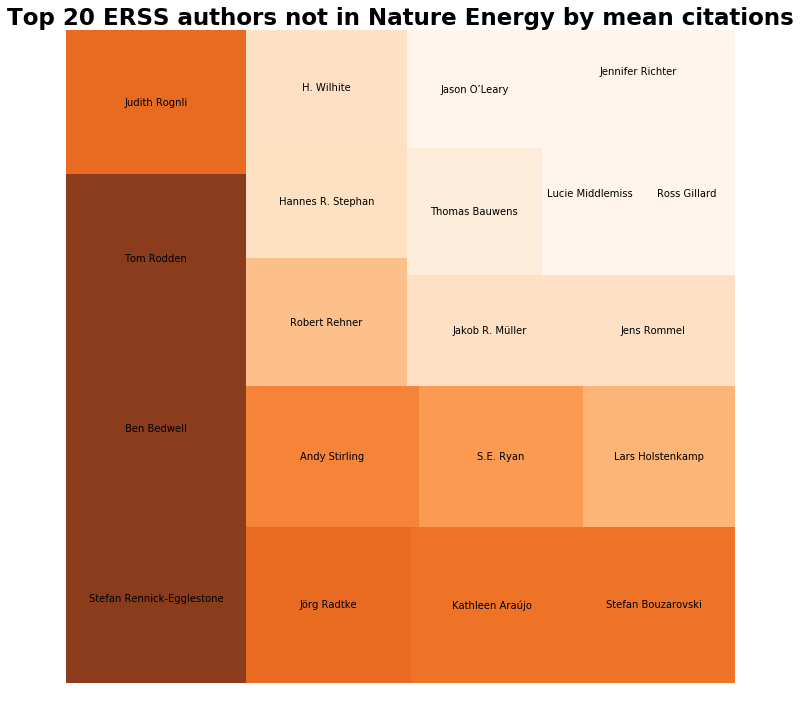

In [109]:
# New dataframe, containing only players with more than 0 goals.
#dataGoals = data[data["G"]>0]
df4 = df3.sort_values('mean_times_cited', ascending=False)[0:20]
df4['mean_times_cited']


#Utilise matplotlib to scale our goal numbers between the min and max, then assign this scale to our values.
norm = matplotlib.colors.Normalize(vmin=min(df4.mean_times_cited), vmax=max(df4.mean_times_cited))
colors = [matplotlib.cm.Oranges(norm(value)) for value in df4.mean_times_cited]

#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(12, 12)

#Use squarify to plot our data, label it and add colours. We add an alpha layer to ensure black labels show through
squarify.plot(label=df4.author,sizes=df4.mean_times_cited, color = colors, alpha=.9)
plt.title("Top 20 ERSS authors not in Nature Energy by mean citations",fontsize=23,fontweight="bold")

#Remove our axes and display the plot
plt.axis('off')
plt.show()
fig.savefig('ERSS.png')